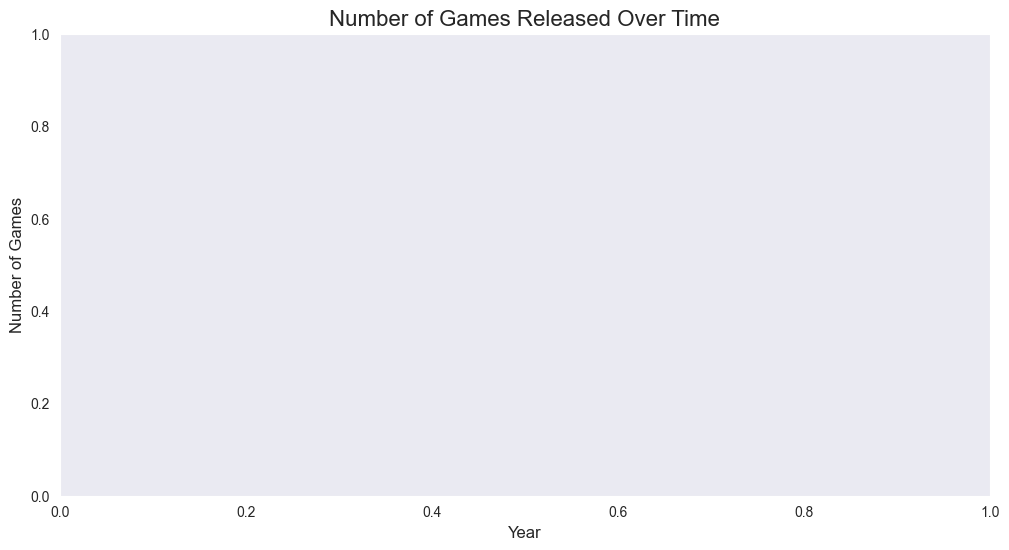

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


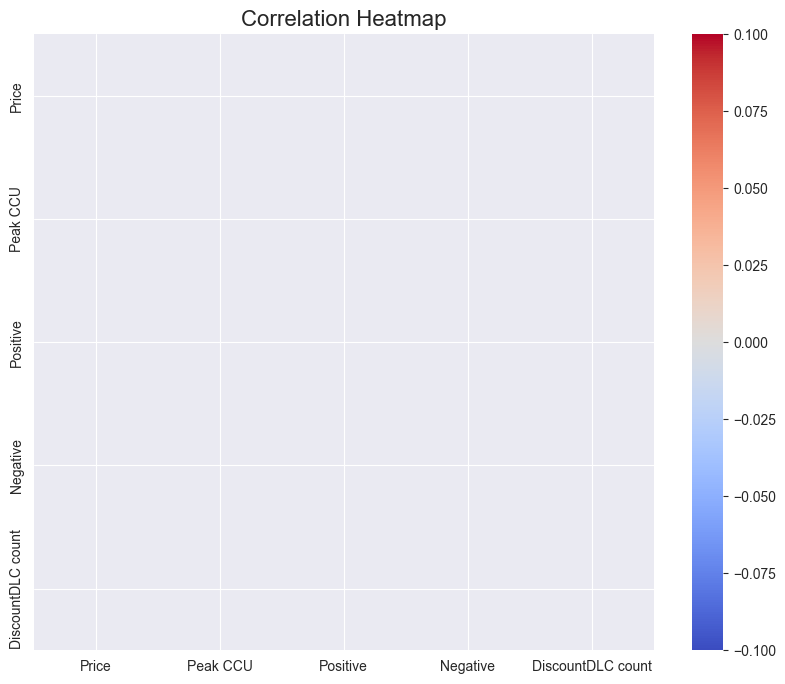

ValueError: Cannot accept list of column references or list of columns for both `x` and `y`.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd

df= pd.read_csv("cleaned_data.csv")

# Ensure Release Year is properly extracted
df['Release Year'] = pd.to_datetime(df['Release date'], errors='coerce').dt.year

# Remove rows with missing values in critical columns
df_cleaned = df.dropna(subset=['Release Year', 'Price', 'Positive', 'Genres'])

# Split genres into lists
df_cleaned['Genres'] = df_cleaned['Genres'].str.split(',')

# Create a DataFrame for exploded genres for better analysis
df_exploded = df_cleaned.explode('Genres')

# Step 1: Trend of game releases over time
release_trend = df_cleaned.groupby('Release Year').size()
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_trend.index, y=release_trend.values, marker='o')
plt.title('Number of Games Released Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.grid()
plt.show()

# Step 2: Correlation heatmap for numerical columns
correlation_cols = ['Price', 'Peak CCU', 'Positive', 'Negative', 'DiscountDLC count']
correlation_matrix = df_cleaned[correlation_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Step 3: Popular genres bar chart
genre_counts = df_exploded['Genres'].value_counts()
fig = px.bar(
    genre_counts.head(10),
    x=genre_counts.head(10).index,
    y=genre_counts.head(10).values,
    title='Top 10 Most Popular Genres',
    labels={'x': 'Genre', 'y': 'Count'},
    template='plotly_white'
)
fig.show()

# Step 4: Boxplot for Positive reviews by genre
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_exploded, x='Genres', y='Positive', showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Positive Reviews by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Positive Reviews', fontsize=12)
plt.grid()
plt.show()

# Step 5: 3D bar chart for genre popularity
fig = px.bar_3d(
    df_exploded.groupby('Genres').size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10),
    x='Genres', y='Count', z='Positive',
    title="3D Bar Chart of Genre Popularity",
    template="plotly_dark"
)
fig.show()
